# PMR3201 Computação para Automação
## EP2 - Árvores k-d

### Nome: Raphael Cardoso de Almeida
### NUSP: 11258120

## Código base

In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
def ha_interseccao(minxa, maxxa, minya, maxya, minxb, maxxb, minyb, maxyb): # Tarefa 1: Verificacao de interseccao entre dois retangulos

  if (maxxa < minxb or minxa > maxxb):
    return False

  if (maxya < minyb or minya > maxyb):
    return False

  return True


def d2(x1, y1, x2, y2): #Função para calcular distância
  return (x2 - x1) ** 2 + (y2 - y1) ** 2


def imprimePonto(x, y): #Função auxiliar do Exercicio 2.
  print(f"Ponto encontrado: ({x}, {y})")



def ponto_ContidoRect(minx, maxx, miny, maxy, x, y): # Verificar se um ponto está contido em um retangulo

  if (x >= minx and x <= maxx):
    if (y >= miny and y <= maxy):
      return True

  return False


def int_circ_rect(minx, maxx, miny, maxy, cx, cy, r2): # Verificar se há intersecção entre um retangulo e circulo.

  #Verificando se o circulo está a direita ou a esquerda do retangulo
  if cx < minx:
    dx = minx - cx
  elif cx > maxx:
    dx = cx - maxx
  else:
    dx = 0

  #Verificando se está acima ou abaixo
  if cy < miny:
    dy = miny - cy
  elif cy > maxy:
    dy = cy - maxy
  else:
    dy = 0

  dist2 = dx**2 + dy**2 #Calculamos a distância ao quadrado, já que é pra evitar usar raizes

  if dist2 < r2: #Há interseccao
    return True
  else:
    return False

class NoArvore2D:
  """ Implementa um nó de árvore 2d (k-d bidimensional)
  """
  def __init__(self, x, y):
    """ Cria um novo nó. x e y são as coordenadas do nó.
    """
    self._x = x       # Coordenada x
    self._y = y       # Coordenada y
    self._e = None    # Sub-árvore esquerda
    self._d = None    # Sub-árvore direita

  # Este é o método recursivo que faz a inserção de um novo nó
  #  Ele é chamada pelo método insere
  def _insere_rec(self, x, y, horizontal):
    if (horizontal and self._x > x) or ((not horizontal) and self._y > y):
      if self._e is None:
        self._e = NoArvore2D(x, y)
      else:
        self._e._insere_rec(x, y, not horizontal)
    else:
      if self._d is None:
        self._d = NoArvore2D(x, y)
      else:
        self._d._insere_rec(x, y, not horizontal)

  def insere(self, x, y):
    """ Insere um novo nó. x e y são as coordenadas do nó a ser inserido na
    árvore."""
    self._insere_rec(x, y, True)

  def busca_mais_proximo(self, x, y):
    # Inicializa as variáveis do ponto mais próximo encontrado até então

    #distancia_quadrado = d2(x, y, self._x, self._y)
    limites = [[-math.inf,math.inf],[-math.inf,math.inf]]

    # Chama o método auxiliar recursivo para encontrar o ponto mais próximo
    ponto_mais_proximo, distancia_quadrado = self._busca_mais_proximo_rec(True, x, y, math.inf, math.inf, limites)

    return ponto_mais_proximo, distancia_quadrado

  def _busca_mais_proximo_rec(self,horizontal ,x, y, xp, yp, limites, distancia_quadrado = math.inf):
    # Verifica se o nó atual está mais próximo do ponto do que o ponto encontrado até então
    nova_distancia_quadrado = d2(x, y, self._x, self._y)
    if nova_distancia_quadrado < distancia_quadrado:
      xp, yp = self._x, self._y
      distancia_quadrado = nova_distancia_quadrado

        # Determina em qual subárvore o ponto desejado seria inserido
    if horizontal:
      if x >= self._x:
        subarvore_proxima = self._d
        subarvore_distante = self._e

        limites = [[self._x, limites[0][1]],[limites[1][0], limites[1][1]]]

      else:
        subarvore_proxima = self._e
        subarvore_distante = self._d

        limites = [[limites[0][0] ,self._x],[limites[1][0], limites[1][1]]]

    else:
      if y >= self._y:
        subarvore_proxima = self._d
        subarvore_distante = self._e

        limites = [[limites[0][0] ,limites[0][1]], [self._y, limites[1][1]]]


      else:
        subarvore_proxima = self._e
        subarvore_distante = self._d
        limites = [[limites[0][0] ,limites[0][1]],[limites[1][0], self._y]]

       #subarvore_proxima = self._d if x >= self._x else self._e
      #subarvore_distante = self._e if x >= self._x else self._d

       # Verifica a interseção entre o círculo centrado no ponto alvo e a subárvore próxima
       #Essa parte não entendi muito bem, é pra verificar se há interssecção entre o circulo e o retanfulo formado pela arvore?

    #Testo o circulo com distancia² com a subarvore proxima


    if subarvore_proxima is not None:
      if horizontal:
        if int_circ_rect(limites[0][0], limites[0][1], limites[1][0], limites[1][1], x, y, distancia_quadrado):
          subarvore_proxima._busca_mais_proximo_rec(False ,x, y, xp, yp, limites, distancia_quadrado)
      else:
        if int_circ_rect(limites[0][0], limites[0][1], limites[1][0], limites[1][1], x, y, distancia_quadrado):
          subarvore_proxima._busca_mais_proximo_rec(True ,x, y, xp, yp, limites, distancia_quadrado)

      # Verifica a interseção entre o círculo centrado no ponto alvo e a subárvore distante
    if subarvore_distante is not None:
      if horizontal:
        if int_circ_rect(limites[0][0], limites[0][1], limites[1][0], limites[1][1], x, y, distancia_quadrado):
          subarvore_distante._busca_mais_proximo_rec(False ,x, y, xp, yp, limites, distancia_quadrado)
      else:
        if int_circ_rect(limites[0][0], limites[0][1], limites[1][0], limites[1][1], x, y, distancia_quadrado):
          subarvore_distante._busca_mais_proximo_rec(True ,x, y, xp, yp, limites, distancia_quadrado)

    return((xp,yp), distancia_quadrado)

  def _procuraRect_rec(self, horizontal, rect, func, X_inf_lim = -math.inf, X_sup_lim = math.inf, Y_inf_lim = -math.inf, Y_sup_lim = math.inf):

    if ponto_ContidoRect(rect[0][0], rect[0][1], rect[1][0], rect[1][1], self._x, self._y):
      func(self._x, self._y)

    if horizontal:
      if self._e:
        if ha_interseccao(X_inf_lim, self._x, Y_inf_lim, self._e._y,rect[0][0], rect[0][1], rect[1][0], rect[1][1]):
          Y_sup_lim = self._e._y
          X_sup_lim = self._x
          horizontal = False
          self._e._procuraRect_rec(horizontal, rect, func, X_inf_lim, X_sup_lim, Y_inf_lim, Y_sup_lim)

      if self._d:
        if ha_interseccao(self._x, X_sup_lim, self._d._y, Y_sup_lim, rect[0][0], rect[0][1], rect[1][0], rect[1][1]):
          X_inf_lim = self._x
          Y_inf_lim = self._d._y
          horizontal = False
          self._d._procuraRect_rec(horizontal, rect, func, X_inf_lim, X_sup_lim, Y_inf_lim, Y_sup_lim)


    else:
      if self._e:
        if ha_interseccao(self._e._x, X_sup_lim, Y_inf_lim, self._y,rect[0][0], rect[0][1], rect[1][0], rect[1][1]):
          Y_sup_lim = self._y
          X_sup_lim = self._e._x
          horizontal = True
          self._e._procuraRect_rec(horizontal, rect, func, X_inf_lim, X_sup_lim, Y_inf_lim, Y_sup_lim)

      if self._d:
        if ha_interseccao(self._d._x, X_sup_lim, self._y, Y_sup_lim, rect[0][0], rect[0][1], rect[1][0], rect[1][1]):
          X_inf_lim = self._d._x
          Y_inf_lim = self._y
          horizontal = True
          self._d._procuraRect_rec(horizontal, rect, func, X_inf_lim, X_sup_lim, Y_inf_lim, Y_sup_lim)


  def procura_rect(self, minx, maxx, miny, maxy, func):
    rect = [[minx, maxx],[miny, maxy]]
    self._procuraRect_rec(True, rect, func)


  def _p_avr_prof_ant_rec(self, horizontal, minx, maxx, miny, maxy, func):
    func(horizontal, self._x, self._y, minx, maxx, miny, maxy)
    if horizontal:
      if self._e:
        self._e._p_avr_prof_ant_rec(False, minx, self._x, miny, maxy, func)
      if self._d:
        self._d._p_avr_prof_ant_rec(False, self._x, maxx, miny, maxy, func)
    else:
      if self._e:
        self._e._p_avr_prof_ant_rec(True, minx, maxx, miny, self._y, func)
      if self._d:
        self._d._p_avr_prof_ant_rec(True, minx, maxx, self._y, maxy, func)

  """ Percore a árvore em profundidade pré-ordem (pai antes dos filhos)
  Para cada nó invoca func(horizontal, x, y, minx, maxx, miny, maxy) onde
  horizontal é verdadeiro se a separação das sub-árvores ocorre no eixo, x, falso caso contrário
x e y são as coordenadas do nó e minx, maxx, miny, maxy são os limites do nó"""
  def percorre_arvore_profundidade_anterior(self, func):
    return self._p_avr_prof_ant_rec(True, -math.inf, math.inf, -math.inf, math.inf, func)

## Exemplo:

In [3]:
def mostra_arvore(ax, raiz):
  def desenha_no(horizontal, x, y, minx, maxx, miny, maxy):
    maxx = min(maxx,10)
    maxy = min(maxy,10)
    minx = max(minx,-10)
    miny = max(miny,-10)
    if horizontal:
      ax.plot([x, x], [miny, maxy], color='r', ls='--', lw=0.5)
    else:
      ax.plot([minx, maxx], [y, y], color='b', ls='--', lw=0.5)
    ax.plot(x, y, ls=None, marker='o', color='k')
  raiz.percorre_arvore_profundidade_anterior(desenha_no)

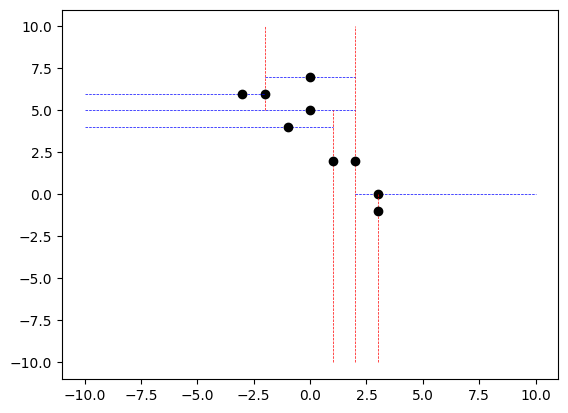

In [4]:
nos = [(2,2),\
       (0,5),\
       (3,0),\
       (1,2),\
       (-2,6),\
       (3,-1),\
       (-1,4),\
       (-3,6),\
       (0,7)]

t = NoArvore2D(*nos[0])
for i in range(1,len(nos)):
  t.insere(*nos[i])

fig, ax = plt.subplots()
mostra_arvore(ax, t)

## Tarefa 1

In [5]:
t.busca_mais_proximo(4,5)

((2, 2), 13)

In [6]:

t1 = ha_interseccao(-3,1,0,2,1,3,1,3)
t2 = ha_interseccao(-2,-1,-2,-1,1,2,1,2)
t3 = ha_interseccao(-3,3,-1,1,-1,1,2,3)
t4 = ha_interseccao(-3,1,-2,2,2,3,0,3)
t5 = ha_interseccao(0,1,0,1,1,2,1,2)
t6 = ha_interseccao(-4,4,-2,2,-1,1,-1,1)
t7 = ha_interseccao(-4,4,-2,2,-2,2,-4,4)
t8 = ha_interseccao(-2,1,-2,1,-1,2,-1,2)


print(t1)
print(t2)
print(t3)
print(t4)
print(t5)
print(t6)
print(t7)
print(t8)

True
False
False
False
True
True
True
True


## Tarefa 2

In [7]:
t.procura_rect(0,3,1,3, imprimePonto)

Ponto encontrado: (2, 2)
Ponto encontrado: (1, 2)


## Tarefa 3

In [8]:
t1 = int_circ_rect(-3, 1, 0, 2, 0, -1, 4)
t2 = int_circ_rect(0, 1, 0, 1, 2, 2, 2)
t3 = int_circ_rect(-5, 5, 0, 1, 0, 4, 25)
t4 = int_circ_rect(-5, 5, 0, 5, 0, 2, 1)
t5 = int_circ_rect(-1, 1, -1, 1, 0, 0, 9)
t6 = int_circ_rect(-3, -1, -3, -1, 2, 2, 16)
t7 = int_circ_rect(3, 4, -1, 1, 1, 0, 1)
t8 = int_circ_rect(-2, 2, -4, -3, -1, 0, 1)

print(t1)
print(t2)
print(t3)
print(t4)
print(t5)
print(t6)
print(t7)
print(t8)

True
False
True
True
True
False
False
False


## Tarefa 4

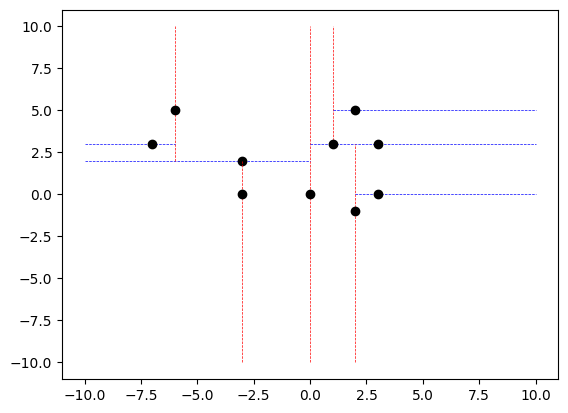

In [9]:
nos = [(0,0),\
       (-3,2),\
       (3,3),\
       (-3,0),\
       (-6,5),\
       (1,3),\
       (2,5),\
       (-7,3),\
       (2,-1),\
       (3,0)]

k = NoArvore2D(*nos[0])
for i in range(1,len(nos)):
  k.insere(*nos[i])

fig, ax = plt.subplots()
mostra_arvore(ax, k)

In [10]:
k.busca_mais_proximo(-1,4)

((0, 0), 17)